In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import time
from scipy import ndimage

%matplotlib inline

In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

(532, 1024, 3)


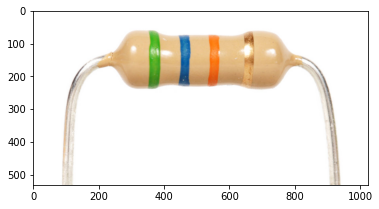

In [3]:
img = cv2.imread("res.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(0)
plt.imshow(img)

# Find Contour

In [4]:
img = cv2.imread("res.jpg")
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,250,255,0)

#contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt = contours[0]

101


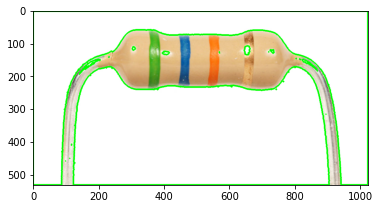

In [5]:
print(len(contours))
real_cnt = []
rect = []
for cnt in contours:
    #print(cnt)
    contour_img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
    perimeter = cv2.arcLength(cnt,True)
    
    if(perimeter > 3000):
        x,y,w,h = cv2.boundingRect(cnt)
        #rect = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        
        plt.imshow(cv2.cvtColor(contour_img,cv2.COLOR_BGR2RGB))


In [6]:
rect

[]

# Center of mass experiments

197 199


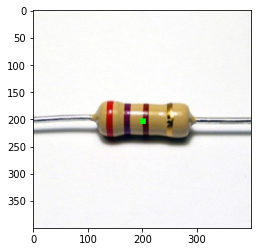

In [13]:
img = cv2.imread("res2.jpg")

# convert image to grayscale image
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,230,255,0)

# calculate moments of binary image
M = cv2.moments(thresh)

# calculate x,y coordinate of center
cY = int(M["m10"] / M["m00"])
cX = int(M["m01"] / M["m00"])

print(cX, cY)

img[cY:cY+10, cX:cX+10] = (0,255,0)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


199 197


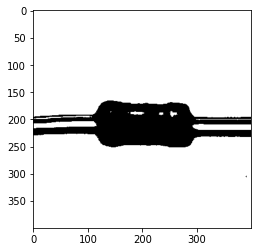

In [11]:
img = cv2.imread("res2.jpg")

# convert image to grayscale image
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,230,255,0)

y,x = ndimage.measurements.center_of_mass(thresh)
y = int(y)
x = int(x)

thresh[y:y+10,x:x+10] = 0
plt.imshow(thresh, cmap='gray')
print(x,y)


# Find resistor box using center of mass

205 74 851 231


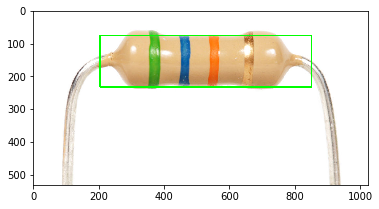

In [103]:
def find_resistor_box(img):
    # convert image to grayscale image
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # convert the grayscale image to binary image
    threshold = 230
    ret, bin_img = cv2.threshold(gray_image,threshold,255,0)
    plt.imshow(bin_img, cmap='gray')

    # find center of mass
    cy,cx = ndimage.measurements.center_of_mass(bin_img)
    
    cx = int(cx)
    cy = int(cy)
    
    # get dimensions of img
    height = len(bin_img)
    width = len(bin_img[0])
    
    # too big is bad
    streak_size = 10
    
    
    # find vertical boundaries
    y_top = 0
    y_bottom = height
    
    # Top boundary
    while(y_top < height):
        region = bin_img[y_top:(y_top + streak_size), cx]
        consistent_black = True
        
        # Stop if found consistent region of black pixels
        for p in region:
            if(p != 0):
                consistent_black = False
                break
        if(consistent_black):
            break
                         
        y_top += 1
    
    # Bottom boundary
    while(y_bottom > 0):
        region = bin_img[(y_bottom - streak_size):y_bottom, cx]
        consistent_black = True
        
        # Stop if found consistent region of black pixels
        for p in region:
            if(p != 0):
                consistent_black = False
                break
        if(consistent_black):
            break
        
        y_bottom -= 1
    
    
    # Update center y
    center_y = (y_top + y_bottom) // 2
    
        
    # Find horizontal boundaries
    x_left = 0
    x_right = width
    
    # Left boundary
    while(x_left < width):      
        region = bin_img[center_y, x_left:(x_left + streak_size)]
        consistent_black = True
        
        # Stop if found consistent region of black pixels
        for p in region:
            if(p != 0):
                consistent_black = False
                break
        if(consistent_black):
            break
        
        x_left += 1
        
    # Right boundary
    while(x_right > 0):
        region = bin_img[center_y, (x_right - streak_size):x_right]
        consistent_black = True
        
        # Stop if found consistent region of black pixels
        for p in region:
            if(p != 0):
                consistent_black = False
                break
        if(consistent_black):
            break
            
        x_right -= 1

        
        
    # Get top left corner
    x1 = x_left
    y1 = y_top
    
    # Get bottom right corner
    x2 = x_right
    y2 = y_bottom
    
    print(x1, y1, x2, y2)
    
    return x1, y1, x2, y2
        
        
        
# test function
img = cv2.imread("res.jpg")
x1, y1, x2, y2 = find_resistor_box(img)
img = cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


116 172 295 248


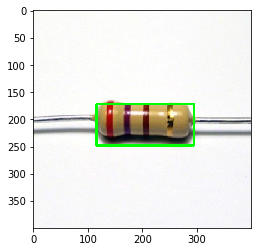

In [104]:
# test function
img = cv2.imread("res2.jpg")
x1, y1, x2, y2 = find_resistor_box(img)
img = cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Find horizontal slice usnig center of mass

532 1024
284 511
74 231
152


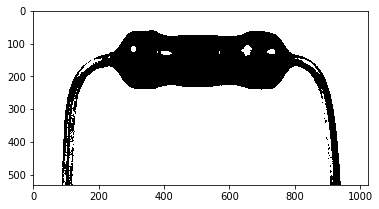

In [99]:
def find_horizontal_slice(img):
    # convert image to grayscale image
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # convert the grayscale image to binary image
    threshold = 230
    ret, bin_img = cv2.threshold(gray_image,threshold,255,0)
    plt.imshow(bin_img, cmap='gray')

    # find center of mass
    cy,cx = ndimage.measurements.center_of_mass(bin_img)
    
    cx = int(cx)
    cy = int(cy)
    
    # get dimensions of img
    height = len(bin_img)
    width = len(bin_img[0])
    
    # too big is bad
    streak_size = 10
    
    print(height, width)
    print(cy, cx)
    
    # find vertical boundaries
    y_top = 0
    y_bottom = height
    
    # Top boundary
    while(y_top < height):
        region = bin_img[y_top:(y_top + streak_size), cx]
        consistent_black = True
        
        # Stop if found consistent region of black pixels
        for p in region:
            if(p != 0):
                consistent_black = False
                break
        if(consistent_black):
            break
                         
        y_top += 1
    
    # Bottom boundary
    while(y_bottom > 0):
        region = bin_img[(y_bottom - streak_size):y_bottom, cx]
        consistent_black = True
        
        # Stop if found consistent region of black pixels
        for p in region:
            if(p != 0):
                consistent_black = False
                break
        if(consistent_black):
            break
        
        y_bottom -= 1
    
    
    # Update center y
    center_y = (y_top + y_bottom) // 2
    
    print(y_top, y_bottom)
    print(center_y)
    
    return center_y


# test function
img = cv2.imread("res.jpg")
slice_value = find_horizontal_slice(img)
img[slice_value:slice_value+5,:] = (0,255,0)


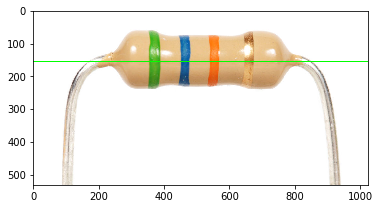

In [100]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

400 400
197 199
172 248
210


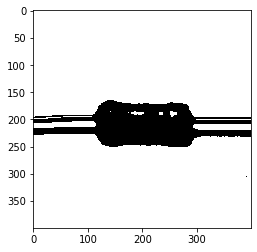

In [101]:
# test function
img = cv2.imread("res2.jpg")
slice_value = find_horizontal_slice(img)
img[slice_value:slice_value+5,:] = (0,255,0)


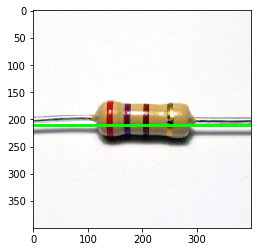

In [102]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))